In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
from optimalEmbedding_sampling import run_optEmbedding_sampling
from GCCM_sampling import run_GCCM_sampling
from nobound_diffusionMean import run_versions_
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from diffusion import remove_linear_signals, run_sim, show_patterns
from grid_diffusionMean import run_grid
from plot import get_mean, get_interval, make_Eplot, make_Lplot

%load_ext autoreload
%autoreload 2

In [2]:
# Set specific font sizes
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 10,     # Title font size
    'axes.labelsize': 10,     # X and Y axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 10,    # Legend font size
})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [4]:
size=100
np.random.seed(seed=10)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

In [5]:
dims = np.arange(1,9)
lib_sizes = np.arange(10,101,30)

In [6]:
#a1 = np.array([2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 
#      1.4e-4, 0.7e-4, 0.35e-4, 0.175e-4, 0.0875e-4, 0.04375e-4, 0.021875e-4])
#a2 = np.flip(a1)
#a_ratio = a1/a2

In [7]:
c_list = [0,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 
     0.11, 0.12, 0.13, 0.14]
a1 = np.linspace(2.8e-3, 2.8e-5,15)
a2 = np.flip(a1)
a_list = np.dstack((a1,a2)).squeeze() #np.array(zip(a1,a2))
a_ratio = a1/a2

In [152]:
a_list.shape[1]

15

In [11]:
list(zip(a_list, a_ratio))

[(array([2.8e-03, 2.8e-05]), 100.0),
 (array([0.002602, 0.000226]), 11.513274336283205),
 (array([0.002404, 0.000424]), 5.669811320754718),
 (array([0.002206, 0.000622]), 3.5466237942122203),
 (array([0.002008, 0.00082 ]), 2.448780487804878),
 (array([0.00181 , 0.001018]), 1.7779960707269158),
 (array([0.001612, 0.001216]), 1.3256578947368423),
 (array([0.001414, 0.001414]), 1.0),
 (array([0.001216, 0.001612]), 0.7543424317617865),
 (array([0.001018, 0.00181 ]), 0.5624309392265192),
 (array([0.00082 , 0.002008]), 0.40836653386454186),
 (array([0.000622, 0.002206]), 0.2819582955575701),
 (array([0.000424, 0.002404]), 0.17637271214642258),
 (array([0.000226, 0.002602]), 0.08685626441199064),
 (array([2.8e-05, 2.8e-03]), 0.01)]

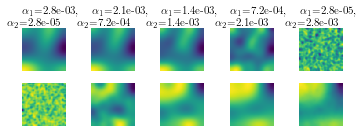

In [46]:
a1_list = np.linspace(2.8e-3, 2.8e-5,5)
a2_list = np.flip(a1_list)

fig, axes = plt.subplots(2,5, figsize=(5, 2))

for i, (a1,a2) in enumerate(zip(a1_list, a2_list)):
    X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2, plot=False)

    ax1 = axes[0, i]
    ax2 = axes[1, i]
                
    show_patterns(X, ax=ax1)
    ax1.set_title(fr'$\alpha_1$={a1:.1e},$\\$ $\alpha_2$={a2:.1e}', fontsize=11)
    show_patterns(Y, ax=ax2)
    
plt.tight_layout()

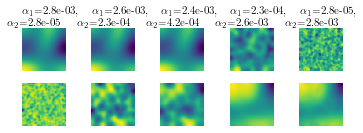

In [35]:
a1_list = np.array([2.8e-3, 2.602e-03, 2.404e-03, 2.260e-04, 2.8e-5])
a2_list = np.array([2.800e-05, 2.260e-04, 4.240e-04, 2.602e-03, 2.800e-03])

fig, axes = plt.subplots(2,5, figsize=(5, 2))

for i, (a1,a2) in enumerate(zip(a1_list, a2_list)):
    X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2, plot=False)

    ax1 = axes[0, i]
    ax2 = axes[1, i]
                
    show_patterns(X, ax=ax1)
    ax1.set_title(fr'$\alpha_1$={a1:.1e},$\\$ $\alpha_2$={a2:.1e}', fontsize=11)
    show_patterns(Y, ax=ax2)
    
plt.tight_layout()

In [48]:
a_list

array([[[2.800e-03, 2.800e-05],
        [2.602e-03, 2.260e-04],
        [2.404e-03, 4.240e-04],
        [2.206e-03, 6.220e-04],
        [2.008e-03, 8.200e-04],
        [1.810e-03, 1.018e-03],
        [1.612e-03, 1.216e-03],
        [1.414e-03, 1.414e-03],
        [1.216e-03, 1.612e-03],
        [1.018e-03, 1.810e-03],
        [8.200e-04, 2.008e-03],
        [6.220e-04, 2.206e-03],
        [4.240e-04, 2.404e-03],
        [2.260e-04, 2.602e-03],
        [2.800e-05, 2.800e-03]]])

In [54]:
a_ratio.round(2)

array([1.000e+02, 1.151e+01, 5.670e+00, 3.550e+00, 2.450e+00, 1.780e+00,
       1.330e+00, 1.000e+00, 7.500e-01, 5.600e-01, 4.100e-01, 2.800e-01,
       1.800e-01, 9.000e-02, 1.000e-02])

In [34]:
for a, r in zip(a_list, a_ratio):
    print(a, 'ratio ',r )

[2.8e-03 2.8e-05] ratio  100.0
[0.002602 0.000226] ratio  11.513274336283205
[0.002404 0.000424] ratio  5.669811320754718
[0.002206 0.000622] ratio  3.5466237942122203
[0.002008 0.00082 ] ratio  2.448780487804878
[0.00181  0.001018] ratio  1.7779960707269158
[0.001612 0.001216] ratio  1.3256578947368423
[0.001414 0.001414] ratio  1.0
[0.001216 0.001612] ratio  0.7543424317617865
[0.001018 0.00181 ] ratio  0.5624309392265192
[0.00082  0.002008] ratio  0.40836653386454186
[0.000622 0.002206] ratio  0.2819582955575701
[0.000424 0.002404] ratio  0.17637271214642258
[0.000226 0.002602] ratio  0.08685626441199064
[2.8e-05 2.8e-03] ratio  0.01


In [150]:
run_GCCM_sampling(X, Y, [100], E=5, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


{'x_xmap_y': {100: {'mean': 0.21228987937927668,
   'sig': 9.285726778829329e-06,
   'conf': (0.3040134415292401, 0.11666662050132152)}},
 'y_xmap_x': {100: {'mean': 0.858703123986721,
   'sig': 0.0,
   'conf': (0.8824545383170694, 0.8305843815673117)}}}

# Visualize bounds 1, 0.01, 100

In [55]:
sample=50
c=0.1
a1 = 1.414e-03
a2 = 1.414e-03    

results_diffsame = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

0.001414 0.001414
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructin

In [56]:
with open('diffusion_results_paper/mean50_c01_t30_diff1.pkl', 'wb') as pickle_file:
    pickle.dump(results_diffsame, pickle_file)

In [116]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diffsame[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [117]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diffsame[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

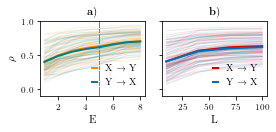

In [121]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diffsame.keys():
    result_L = results_diffsame[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,       frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_1.pdf', bbox_inches='tight')

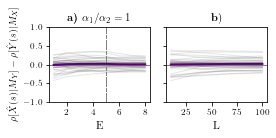

In [122]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=1$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diffsame.keys():
    result_L = results_diffsame[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_1.pdf', bbox_inches='tight')

In [63]:
sample=50
c=0.1
a1 = 2.800e-05
a2 = 2.800e-03   

results_diff01 = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

2.8e-05 0.0028
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructing e

In [64]:
with open('diffusion_results_paper/mean50_c01_t30_diff001.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff01, pickle_file)

In [123]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff01[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [124]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff01[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

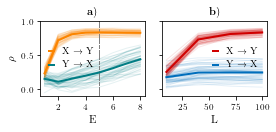

In [125]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff01.keys():
    result_L = results_diff01[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_001.pdf', bbox_inches='tight')

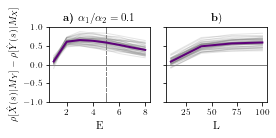

In [126]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff01.keys():
    result_L = results_diff01[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))


for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_001.pdf', bbox_inches='tight')

In [69]:
sample=50
c=0.1
a1 = 2.800e-03
a2 = 2.800e-05   

results_diff10 = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

0.0028 2.8e-05
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructing e

In [70]:
with open('diffusion_results_paper/mean50_c01_t30_diff100.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff10, pickle_file)

In [127]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff10[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [128]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff10[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

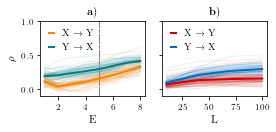

In [129]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff10.keys():
    result_L = results_diff10[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_100.pdf', bbox_inches='tight')

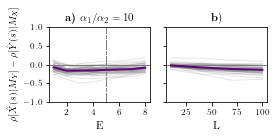

In [130]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=10$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff10.keys():
    result_L = results_diff10[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))


for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_100.pdf', bbox_inches='tight')

In [105]:
with open('diffusion_results_paper/plot/mean50_c01_t30_diff10.pkl', 'rb') as pickle_file:
    results_diff = pickle.load(pickle_file)

In [106]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [107]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

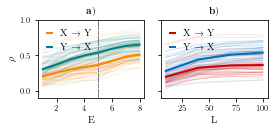

In [108]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff.keys():
    result_L = results_diff[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_10.pdf', bbox_inches='tight')

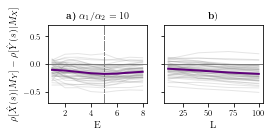

In [109]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.7,0.7)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=10$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff.keys():
    result_L = results_diff[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_10.pdf', bbox_inches='tight')

## Heatmap

In [8]:
import uuid

In [9]:
with open('diffusion_results_paper/results.pkl', 'rb') as pickle_file:
    results = pickle.load(pickle_file)

In [10]:
diff_map = {}

for i in results['results_map'].keys():
    c = results['meta'][i][2]
    a1 = results['meta'][i][3]
    a2 = results['meta'][i][4]
    
    sample = results['results_map'][i]
    diff = []
    for k in sample.keys():
        result_L = sample[k]['gccm']
        x_xmap_y, y_xmap_x = get_mean(result_L, [100])
        diff.append(y_xmap_x-x_xmap_y)
    diff_map[i] = np.array(diff).mean()

    print(c, a1/a2, np.array(diff).mean())

0 100.0 -0.14994380527925594
0 11.513274336283205 -0.18214304096062495
0 5.669811320754718 -0.13627455429076615
0 3.5466237942122203 -0.1015742794751782
0 2.448780487804878 -0.06858229946204202
0 1.7779960707269158 -0.04046370354881726
0 1.3256578947368423 -0.01670196128115752
0 1.0 0.014790825173649512
0 0.7543424317617865 0.04097934365133311
0 0.5624309392265192 0.062026704583195216
0 0.40836653386454186 0.08301674068874877
0 0.2819582955575701 0.09794102578982318
0 0.17637271214642258 0.13771978356052925
0 0.08685626441199064 0.18286914671481846
0 0.01 0.17518819931385418
0.01 100.0 -0.1513583932593933
0.01 11.513274336283205 -0.18870803784109633
0.01 5.669811320754718 -0.13542091265186154
0.01 3.5466237942122203 -0.10716317184006138
0.01 2.448780487804878 -0.06966355811913516
0.01 1.7779960707269158 -0.04441025256104388
0.01 1.3256578947368423 -0.01221568644748311
0.01 1.0 0.01202134417948867
0.01 0.7543424317617865 0.034156967043156745
0.01 0.5624309392265192 0.06119878127138463
0

In [115]:
np.array(list(diff_map.values())).max()

0.5892206597903163

In [116]:
np.array(list(diff_map.values())).min()

-0.18872540530735477

In [117]:
np.array(list(diff_map.values())).reshape(len(c_list), a_list.shape[0])

array([[-0.14994381, -0.18214304, -0.13627455, -0.10157428, -0.0685823 ,
        -0.0404637 , -0.01670196,  0.01479083,  0.04097934,  0.0620267 ,
         0.08301674,  0.09794103,  0.13771978,  0.18286915,  0.1751882 ],
       [-0.15135839, -0.18870804, -0.13542091, -0.10716317, -0.06966356,
        -0.04441025, -0.01221569,  0.01202134,  0.03415697,  0.06119878,
         0.08238566,  0.10250802,  0.14411291,  0.18871263,  0.23045078],
       [-0.15140111, -0.1856433 , -0.14163022, -0.11758444, -0.06842371,
        -0.04378486, -0.01336258,  0.01109481,  0.03733297,  0.05790196,
         0.08562465,  0.108714  ,  0.14143519,  0.19286597,  0.3365167 ],
       [-0.15041399, -0.18116694, -0.14103962, -0.10683058, -0.0662416 ,
        -0.03748831, -0.01297846,  0.01520249,  0.04173107,  0.05558121,
         0.0833216 ,  0.11107142,  0.14841732,  0.2076466 ,  0.41798696],
       [-0.1477441 , -0.17928678, -0.13902835, -0.1069096 , -0.0599613 ,
        -0.03393124, -0.0099579 ,  0.02129465, 

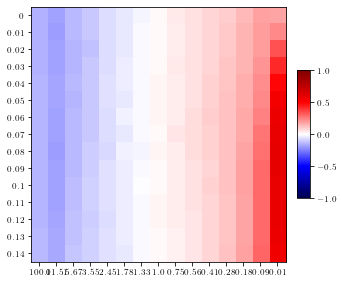

In [61]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
p = plt.imshow(np.array(list(diff_map.values())).reshape(len(c_list), a_list.shape[0]), 
               cmap='seismic', vmin=-1, vmax=1)

ax.set_xticks(np.arange(a_ratio.shape[0])) 
ax.set_xticklabels(a_ratio.round(2))            
ax.set_yticks(np.arange(len(c_list)))  
ax.set_yticklabels(c_list)

cbar = fig.colorbar(p, fraction=0.046, pad=0.04, aspect=10)

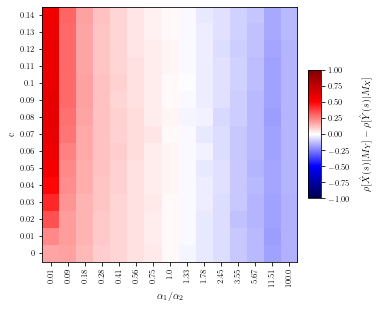

In [113]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
p = plt.imshow(np.array(list(diff_map.values())).reshape(len(c_list), a_list.shape[0]), 
               cmap='seismic', vmin=-1, vmax=1, origin='lower')
ax.invert_xaxis()

ax.set_xticks(np.arange(a_ratio.shape[0])) 
ax.set_xticklabels(a_ratio.round(2))        
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_yticks(np.arange(len(c_list)))  
ax.set_yticklabels(c_list)

ax.set_xlabel(r'$\alpha_1/\alpha_2$')
ax.set_ylabel(r'c')

cbar = fig.colorbar(p, fraction=0.046, pad=0.04, aspect=10)
cbar.set_label(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10, labelpad=10)

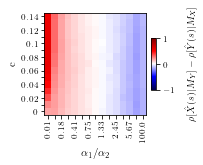

In [83]:
fig, ax = plt.subplots(1,1, figsize=(2,2))
p = plt.imshow(np.array(list(diff_map.values())).reshape(len(c_list), a_list.shape[0]), 
               cmap='seismic', vmin=-1, vmax=1, origin='lower')
ax.invert_xaxis()

ax.set_xticks(np.arange(a_ratio.shape[0]))     
ax.set_yticks(np.arange(len(c_list)))  
# Only show every second label for the x-axis
ax.set_xticklabels([label if idx % 2 == 0 else '' for idx, label in enumerate(a_ratio.round(2))])
plt.setp(ax.get_xticklabels(), rotation=90)

# Only show every second label for the y-axis
ax.set_yticklabels([label if idx % 2 == 0 else '' for idx, label in enumerate(c_list)])

ax.set_xlabel(r'$\alpha_1/\alpha_2$')
ax.set_ylabel(r'c')

cbar = fig.colorbar(p, fraction=0.046, pad=0.04, aspect=10)
cbar.set_label(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10, labelpad=10)

plt.savefig('plots_paper/heatmap.pdf', bbox_inches='tight')

## Distribution of correlations

In [18]:
results['results_map'][uuid.UUID('1e069bc6-b31c-430f-8030-d498de1ad14d')][0]['gccm']['x_xmap_y'][100]['sig']

4.075304071982089e-08

In [18]:
correlation_map = {}

for i in results['results_map'].keys():
    c = results['meta'][i][2]
    a1 = results['meta'][i][3]
    a2 = results['meta'][i][4]
    
    sample = results['results_map'][i]
    corr = []
    for k in sample.keys():
        corr.append(sample[k]['corr'][0])
    correlation_map[i] = np.array(corr).mean()

    print(c, a1/a2, np.array(corr).mean())

0 100.0 -0.00036842829621077375
0 11.513274336283205 -0.004328533333328773
0 5.669811320754718 -0.007767692152221206
0 3.5466237942122203 -0.010254040382276756
0 2.448780487804878 -0.011666371035834957
0 1.7779960707269158 -0.01228350882567697
0 1.3256578947368423 -0.012338295831281161
0 1.0 -0.011966180408504721
0 0.7543424317617865 -0.011234780535003814
0 0.5624309392265192 -0.010160547683175265
0 0.40836653386454186 -0.00871054864789453
0 0.2819582955575701 -0.00681701198493066
0 0.17637271214642258 -0.004481477570912542
0 0.08685626441199064 -0.002168680087834504
0 0.01 -0.0015826135405978218
0.01 100.0 0.003021438960512445
0.01 11.513274336283205 0.0073059008915340095
0.01 5.669811320754718 0.00809466401549601
0.01 3.5466237942122203 0.008742862800410428
0.01 2.448780487804878 0.009888657815017883
0.01 1.7779960707269158 0.011444763045540771
0.01 1.3256578947368423 0.013265394420015453
0.01 1.0 0.015249196915700966
0.01 0.7543424317617865 0.017327595757369925
0.01 0.56243093922651

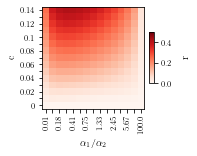

In [33]:
fig, ax = plt.subplots(1,1, figsize=(2,2))
p = plt.imshow(np.array(list(correlation_map.values())).reshape(len(c_list), a_list.shape[0]), 
               cmap='Reds', vmin=0, vmax=0.5, origin='lower')
ax.invert_xaxis()

ax.set_xticks(np.arange(a_ratio.shape[0]))     
ax.set_yticks(np.arange(len(c_list)))  
# Only show every second label for the x-axis
ax.set_xticklabels([label if idx % 2 == 0 else '' for idx, label in enumerate(a_ratio.round(2))])
plt.setp(ax.get_xticklabels(), rotation=90)

# Only show every second label for the y-axis
ax.set_yticklabels([label if idx % 2 == 0 else '' for idx, label in enumerate(c_list)])

ax.set_xlabel(r'$\alpha_1/\alpha_2$')
ax.set_ylabel(r'c')

cbar = fig.colorbar(p, fraction=0.046, pad=0.04, aspect=10)
cbar.set_label(r'r', fontsize=10, labelpad=10)

plt.savefig('plots_paper/heatmap_corr.pdf', bbox_inches='tight')

In [30]:
p_yx_list = []
for i in results['results_map'].keys():
    c = results['meta'][i][2]
    a1 = results['meta'][i][3]
    a2 = results['meta'][i][4]
    
    sample = results['results_map'][i]
    for k in sample.keys():
        p_yx_list.append(sample[k]['gccm']['x_xmap_y'][100]['sig'])

p_xy_list = []
for i in results['results_map'].keys():
    c = results['meta'][i][2]
    a1 = results['meta'][i][3]
    a2 = results['meta'][i][4]
    
    sample = results['results_map'][i]
    for k in sample.keys():
        p_xy_list.append(sample[k]['gccm']['y_xmap_x'][100]['sig'])

In [33]:
len(p_xy_list)

11250

In [34]:
(np.array(p_xy_list)>0.05).sum()

127

In [32]:
(np.array(p_yx_list)>0.05).sum()

71

(array([11091.,    88.,    37.,    34.]),
 array([0.  , 0.01, 0.05, 0.1 , 1.  ]),
 <BarContainer object of 4 artists>)

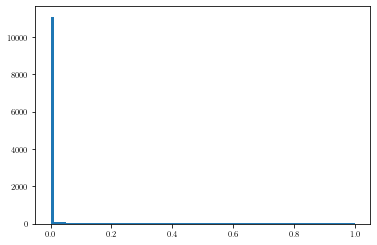

In [22]:
plt.hist(p_yx_list, [0,0.01, 0.05,0.1,1])

In [38]:
count_list = []
for i in results['results_map'].keys():
    c = results['meta'][i][2]
    a1 = results['meta'][i][3]
    a2 = results['meta'][i][4]
    
    sample = results['results_map'][i]
    p_list=[]
    for k in sample.keys():
        p_list.append(sample[k]['gccm']['y_xmap_x'][100]['sig'])
        p_list.append(sample[k]['gccm']['x_xmap_y'][100]['sig'])
    print(c, a1/a2, '\n insignificant', (np.array(p_list)>0.05).sum(), (np.array(p_list)>0.05).sum()/len(p_list))
    count_list.append((np.array(p_list)>0.05).sum())

0 100.0 
 insignificant 9 0.09
0 11.513274336283205 
 insignificant 0 0.0
0 5.669811320754718 
 insignificant 0 0.0
0 3.5466237942122203 
 insignificant 0 0.0
0 2.448780487804878 
 insignificant 0 0.0
0 1.7779960707269158 
 insignificant 0 0.0
0 1.3256578947368423 
 insignificant 0 0.0
0 1.0 
 insignificant 0 0.0
0 0.7543424317617865 
 insignificant 0 0.0
0 0.5624309392265192 
 insignificant 0 0.0
0 0.40836653386454186 
 insignificant 0 0.0
0 0.2819582955575701 
 insignificant 0 0.0
0 0.17637271214642258 
 insignificant 0 0.0
0 0.08685626441199064 
 insignificant 0 0.0
0 0.01 
 insignificant 8 0.08
0.01 100.0 
 insignificant 10 0.1
0.01 11.513274336283205 
 insignificant 0 0.0
0.01 5.669811320754718 
 insignificant 0 0.0
0.01 3.5466237942122203 
 insignificant 0 0.0
0.01 2.448780487804878 
 insignificant 0 0.0
0.01 1.7779960707269158 
 insignificant 0 0.0
0.01 1.3256578947368423 
 insignificant 0 0.0
0.01 1.0 
 insignificant 0 0.0
0.01 0.7543424317617865 
 insignificant 0 0.0
0.01 0.56

(array([194.,   6.,   1.,   1.,   0.,   2.,   2.,   3.,   6.,  10.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

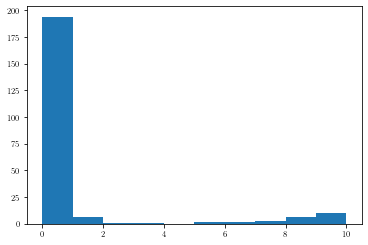

In [41]:
plt.hist(count_list)